<a href="https://colab.research.google.com/github/Vaishnavirajulu21/breast-cancer/blob/main/Multiclass_breast_cancer_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
import tensorflow as tf
print('tensorflow version used:',tf.__version__)

tensorflow version used: 2.12.0


In [ ]:
#!pip install matplotlib
#!pip install pandas
#!pip install scikit-learn
#!pip install tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import os
from os import listdir
from tqdm import tqdm
import shutil
!pip install opendatasets --upgrade --quiet
#!pip install focal-loss
import opendatasets as od
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils
!pip install np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import SGD, rmsprop_v2
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
tf.keras.utils
#%matplotlib inline
print('Required Frame works are included')

Required Frame works are included


In [ ]:
cd "C:/Windows/System32/project/multiclass breastcancerclass"

C:\Windows\System32\project\multiclass breastcancerclass


In [ ]:
pwd

'C:\\Windows\\System32\\project\\multiclass breastcancerclass'

In [ ]:

train_path="./multicalssbreastcancer_dataset/train/"
valid_path = "./multicalssbreastcancer_dataset/valid/"
print('Input loaded successfully')

Input loaded successfully


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    #samplewise_center=True,
    #samplewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.0],
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.0],
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
print('Augmentation Process successfully')

Augmentation Process successfully


In [ ]:
img_size = 256

In [ ]:
train_batches = train_datagen.flow_from_directory(directory=train_path, target_size=(img_size,img_size),
                                                  class_mode = 'categorical', batch_size=32, shuffle=True)
valid_batches = valid_datagen.flow_from_directory(directory=valid_path, target_size=(img_size,img_size),
                                                  class_mode = 'categorical', batch_size=32, shuffle = False)

Found 7200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
len(train_batches)

225

In [ ]:
imgs, labels = next(train_batches)


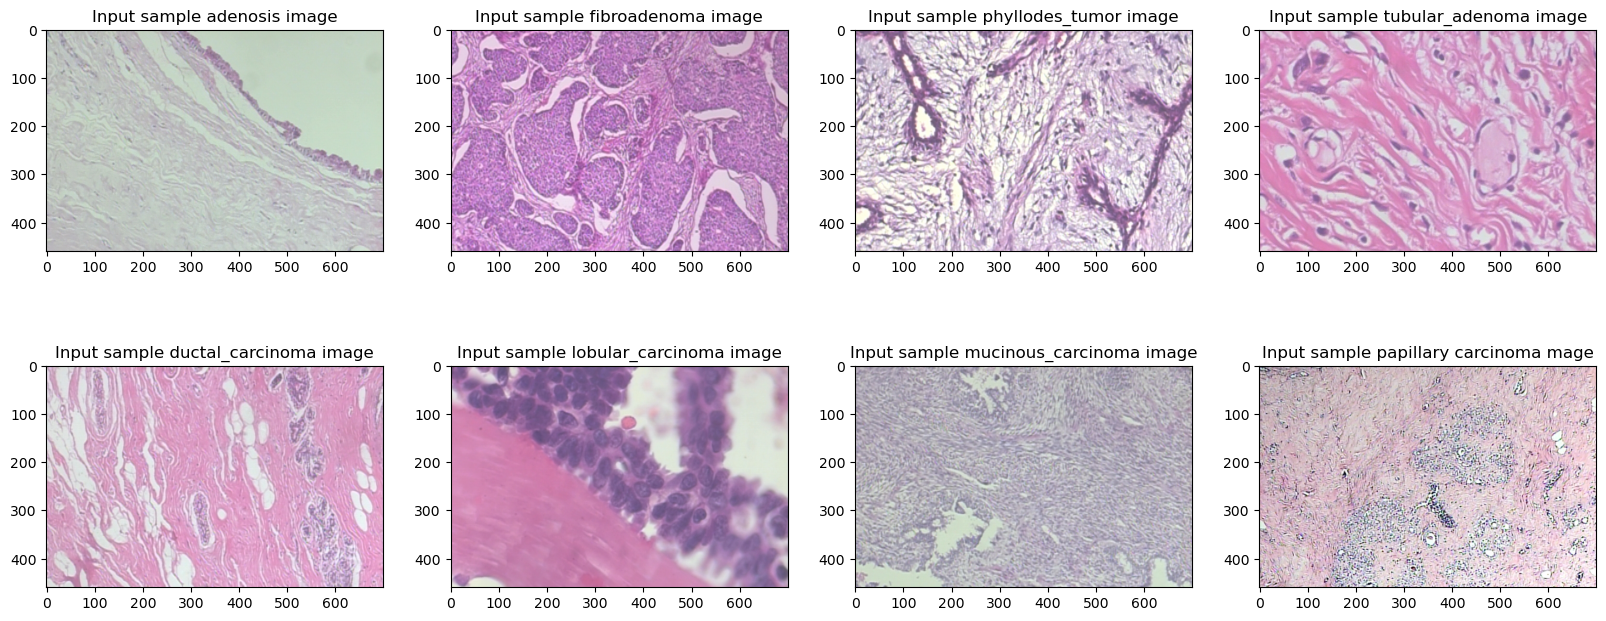

In [ ]:
#!pip install matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Read Images
img1 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//A//copy-copy-copy-copy-copy-copy-copy-copy-copy-copy-SOB_B_A-14-22549CD-40-004.png')
img2 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//DC//SOB_M_DC-14-2523-40-011.png')
img3 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//F//copy-copy-copy-copy-copy-copy-copy-SOB_B_F-14-14134-100-018.png')
img4 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//LC//copy-copy-copy-copy-copy-copy-copy-SOB_M_LC-14-15570-200-028.png')
img5 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//MC//copy-copy-copy-copy-copy-copy-SOB_M_MC-14-16456-40-052.png')
img6 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//PC//copy-copy-copy-copy-copy-copy-copy-copy-SOB_M_PC-14-9146-400-009.png')
img7 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train//PT//copy-copy-copy-copy-copy-copy-copy-copy-copy-copy-SOB_B_PT-14-21998AB-40-014.png')
img8 = mpimg.imread('C:/Windows/System32/project/multiclass breastcancerclass//multicalssbreastcancer_dataset//train/TA//copy-copy-copy-copy-copy-copy-copy-copy-SOB_B_TA-14-13200-40-007.png')


fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(2,4,1)
plt.title('Input sample adenosis image')
ax1.imshow(img1)

ax2 = fig.add_subplot(2,4,2)
plt.title('Input sample fibroadenoma image')
ax2.imshow(img2)

ax3 = fig.add_subplot(2,4,3)
plt.title('Input sample phyllodes_tumor image')
ax3.imshow(img3)

ax4 = fig.add_subplot(2,4,4)
plt.title('Input sample tubular_adenoma image')
ax4.imshow(img4)

ax5 = fig.add_subplot(2,4,5)
plt.title('Input sample ductal_carcinoma image')
ax5.imshow(img5)

ax6 = fig.add_subplot(2,4,6)
plt.title('Input sample lobular_carcinoma image')
ax6.imshow(img6)

ax7 = fig.add_subplot(2,4,7)
plt.title('Input sample mucinous_carcinoma image')
ax7.imshow(img7)

ax8 = fig.add_subplot(2,4,8)
plt.title('Input sample papillary carcinoma mage')
ax8.imshow(img8)

In [ ]:
#create base model
model=sequential()
model.add

In [ ]:
k_size = 5
model = Sequential([
    Conv2D(filters=64, kernel_size=(k_size, k_size), activation='relu', padding = 'same', input_shape=(img_size,img_size,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=3),

    Conv2D(filters=128, kernel_size=(k_size, k_size), activation='relu', padding = 'same'),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=(k_size, k_size), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),

    Conv2D(filters=256, kernel_size=(k_size, k_size), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=512, kernel_size=(k_size, k_size), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),

    Conv2D(filters=512, kernel_size=(k_size, k_size), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=8, activation='softmax')
])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      4864      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 128)       204928    
                                                                 
 batch_normalization_1 (Bat  (None, 85, 85, 128)       512       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer=tf.
              keras.optimizers.Adam(learning_rate=0.5E-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class_weight = {0: 17.8025,
 1: 7.7995618838992335,
 2: 17.45343137254902,
 3: 13.881091617933723,
 4: 2.292659368963297,
 5: 12.625886524822695,
 6: 9.987377279102384,
 7: 14.128968253968255}

class_weight

{0: 17.8025,
 1: 7.7995618838992335,
 2: 17.45343137254902,
 3: 13.881091617933723,
 4: 2.292659368963297,
 5: 12.625886524822695,
 6: 9.987377279102384,
 7: 14.128968253968255}

In [ ]:
if not os.path.isdir('./breakhis_chkpt'):
    os.mkdir('./breakhis_chkpt')

In [ ]:
checkpoint_filepath = os.path.join('./breakhis_chkpt','{epoch:02d}-{val_accuracy:.4f}.hdf5')
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#!pip install pillow
model.fit(x = train_batches,steps_per_epoch=len(train_batches), validation_data=valid_batches, callbacks=[callback],class_weight = class_weight, validation_steps=len(valid_batches),epochs = 60,verbose = 1)

Epoch 1/60


225/225 [==============================] - 2583s 11s/step - loss: 22.6809 - accuracy: 0.3233 - val_loss: 5.7560 - val_accuracy: 0.1250
Epoch 2/60
225/225 [==============================] - 2506s 11s/step - loss: 19.2645 - accuracy: 0.3818 - val_loss: 5.3652 - val_accuracy: 0.1262
Epoch 3/60
225/225 [==============================] - 2532s 11s/step - loss: 17.4688 - accuracy: 0.4194 - val_loss: 2.8036 - val_accuracy: 0.2800
Epoch 4/60
225/225 [==============================] - 2444s 11s/step - loss: 16.1326 - accuracy: 0.4574 - val_loss: 2.1327 - val_accuracy: 0.4000
Epoch 5/60
225/225 [==============================] - 2442s 11s/step - loss: 15.0519 - accuracy: 0.4868 - val_loss: 1.7740 - val_accuracy: 0.4100
Epoch 6/60
225/225 [==============================] - 2448s 11s/step - loss: 14.0963 - accuracy: 0.5113 - val_loss: 2.0507 - val_accuracy: 0.4162
Epoch 7/60
225/225 [==============================] - 2450s 11s/step - loss: 13.1587 - accuracy: 0.5339 - val_loss: 1.7097

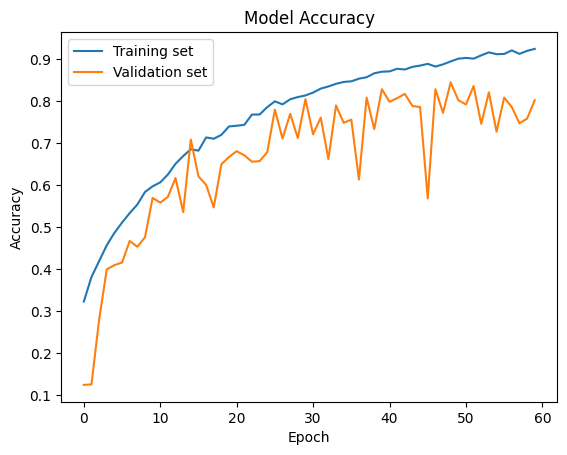

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

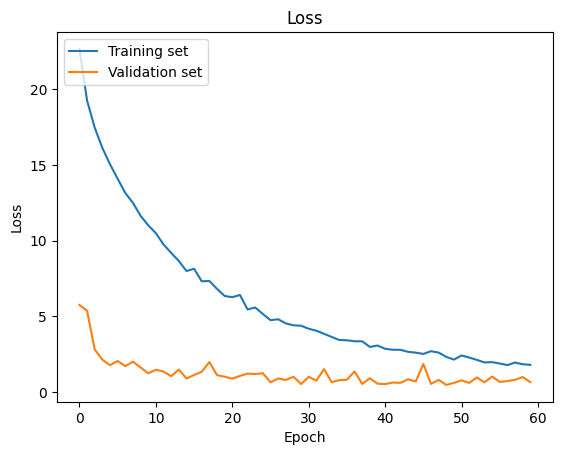

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x = valid_batches,steps = len(valid_batches), verbose = 0)
predictions = np.argmax(predictions, axis = -1)

In [ ]:
cm = confusion_matrix(y_true=valid_batches.classes, y_pred=predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['A','F','PT','TA','DC','LC','MC','PC'])
    plt.yticks(tick_marks, classes)

    plt.colorbar()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    #plt.tight_layout(pad=0.01)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

0.9 0.925 0.971 0.948
Accuracy :0.9
Precision: 0.925
Recall: 0.971
F1 score: 0.948


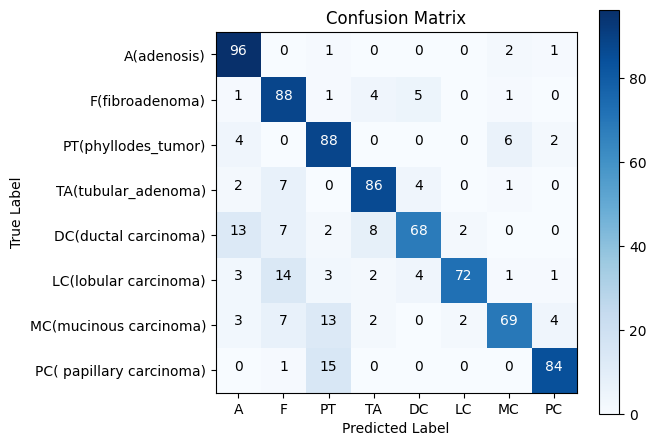

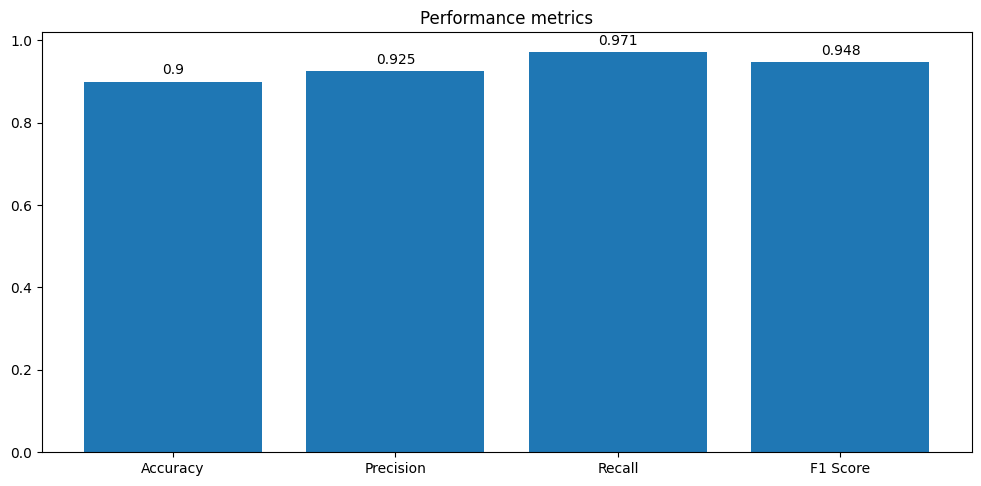

function to plot True,Predicted,Performance metrics


In [ ]:
classes = ['A(adenosis)', 'F(fibroadenoma)', 'PT(phyllodes_tumor)', 'TA(tubular_adenoma)', 'DC(ductal carcinoma)',
           'LC(lobular carcinoma)', 'MC(mucinous carcinoma)', 'PC( papillary carcinoma)']
plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix')
TPA=cm[0][0]
FPA=cm[0][1]
FNA=cm[0][3]
FNB=cm[1][0]
TPB=cm[1][1]
FPB=cm[1][2]
FPC=cm[2][0]
TPC=cm[2][2]
FNC=cm[2][3]
FND=cm[3][0]
FPD=cm[3][1]
TPD=cm[3][3]
FPE=cm[4][0]
FNE=cm[4][3]
TPE=cm[4][4]
FNF=cm[5][0]
FPF=cm[5][1]
TPF=cm[3][5]
FNG=cm[6][0]
FPG=cm[6][1]
TPG=cm[6][6]
FNH=cm[7][0]
FPH=cm[7][1]
TPH=cm[7][7]
A=(TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)/(TPA+FPA+FNA+FNB+TPB+FPB+FPC+TPC+FNC+FND+FPD+TPD+FPE+FNE+TPE+FNF+FPF+TPF+FNG+FPG+TPG+FNH+FPH+TPH)
P=(TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)/((TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)+(FPA+FPB+FPC+FPD+FPE+FPF+FPG+FPH))
RC=(TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)/((TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)+(FNA+FNB+FNC+FND+FNE+FNF+FNG+FNH))
#F1=(TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)/((TPA+TPB+TPC+TPD+TPE+TPF+TPG+TPH)+(FPA+FPB+FPC+FPD+FPE+FPF+FPG+FPH)+(FNA+FNB+FNC+FND+FNE+FNF+FNG+FNH))
F1=(2*P*RC)/(P+RC)
A=round(A,3)
P=round(P,3)
RC=round(RC,3)
F1=round(F1,3)
print(A,P,RC,F1)

print(f"Accuracy :{A}")
print(f"Precision: {P}")
print(f"Recall: {RC}")
print(f"F1 score: {F1}")

# Create a figure object
fig = plt.figure(figsize=(12, 12))

# Add a subplot to the figure
ax = fig.add_subplot(2,1,1)

# Create the bar plot
bars = ax.bar(['Accuracy','Precision','Recall','F1 Score'],[A,P,RC,F1])

# Loop through the bars and add annotations
for bar in bars:
  height = bar.get_height()
  ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.title('Performance metrics')
plt.show()
print('function to plot True,Predicted,Performance metrics')


25/25 [==============================] - 57s 2s/step


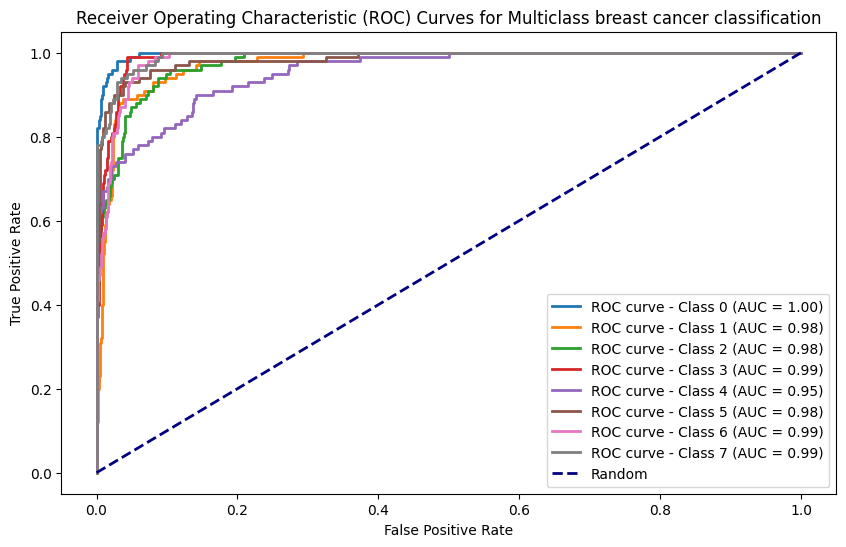

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

num_classes = 8

# Assuming you have a TensorFlow model and validation data
# Example:
# model = tf.keras.models.load_model('your_model.h5')
# valid_batches = your_validation_data_generator

# Get predictions from the model
predictions = model.predict(valid_batches)

# Convert one-hot encoded labels to integers
y_true = valid_batches.classes

# Convert integer labels to one-hot encoding
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

# Compute ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for individual classes
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiclass breast cancer classification')
plt.legend(loc='lower right')
plt.show()



25/25 [==============================] - 68s 3s/step


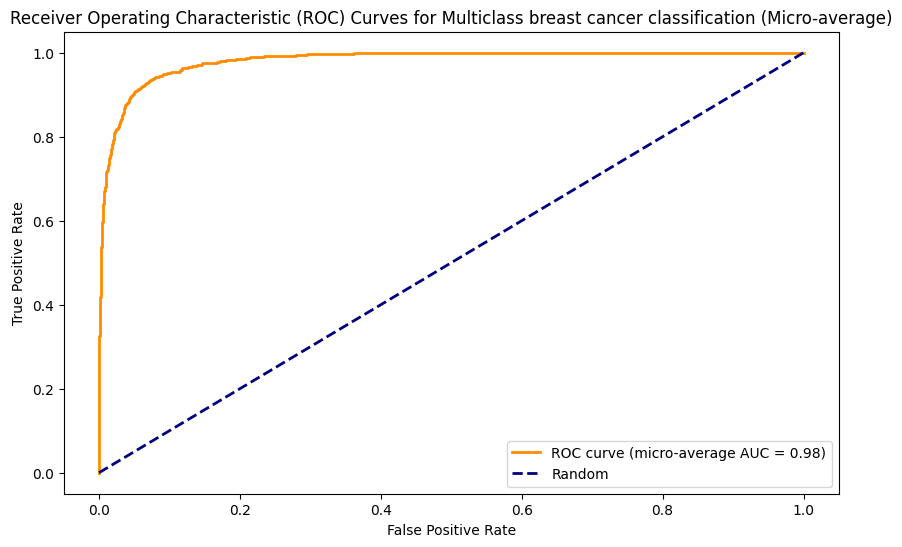

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
num_classes=8
# Assuming you have a TensorFlow model and validation data
# Example:
# model = tf.keras.models.load_model('your_model.h5')
# valid_batches = your_validation_data_generator

# Get predictions from the model
predictions = model.predict(valid_batches)

# Convert one-hot encoded labels to integers
y_true = valid_batches.classes

# Convert integer labels to one-hot encoding
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

# Compute ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Ensure that the loop does not access indices beyond the bounds of the predictions array
for i in range(min(num_classes, predictions.shape[1])):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_one_hot.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label=f'ROC curve (micro-average AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiclass breast cancer classification (Micro-average)')
plt.legend(loc='lower right')
plt.show()


25/25 [==============================] - 58s 2s/step


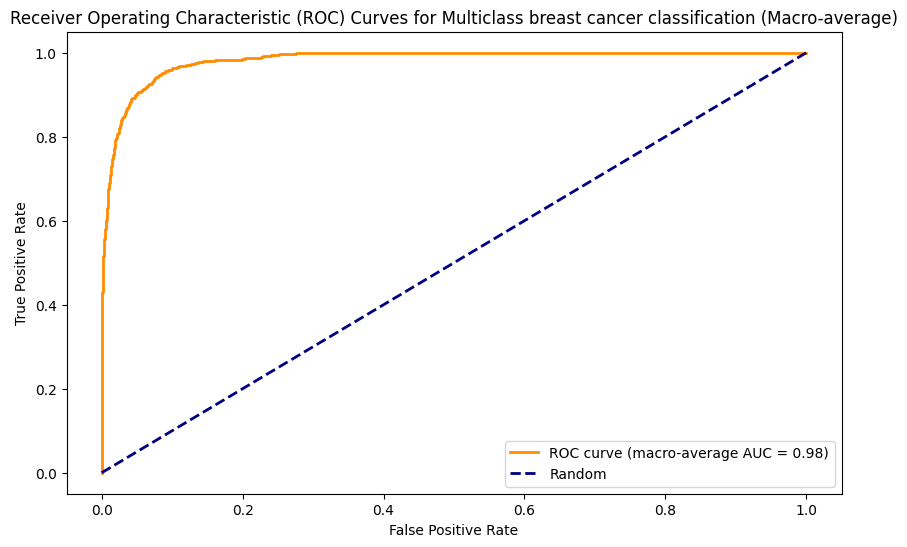

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
num_classes=8
# Assuming you have a TensorFlow model and validation data
# Example:
# model = tf.keras.models.load_model('your_model.h5')
# valid_batches = your_validation_data_generator

# Get predictions from the model
predictions = model.predict(valid_batches)

# Convert one-hot encoded labels to integers
y_true = valid_batches.classes

# Convert integer labels to one-hot encoding
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

# Compute ROC curve and area under the curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Ensure that the loop does not access indices beyond the bounds of the predictions array
for i in range(min(num_classes, predictions.shape[1])):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# macro-average ROC curve and AUC
fpr["macro"], tpr["macro"], _ = roc_curve(y_true_one_hot.ravel(), predictions.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the macro-average ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label=f'ROC curve (macro-average AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiclass breast cancer classification (Macro-average)')
plt.legend(loc='lower right')
plt.show()